# MNIST

In [1]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

C:\Users\kpvedula\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Loads the training and test data sets (ignoring class labels)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

(x_train.shape, x_test.shape)

((60000, 784), (10000, 784))

In [5]:
# input dimension = 784
input_dim = x_train.shape[1]
encoding_dim = 32

compression_factor = float(input_dim) / encoding_dim
print("Compression factor: %s" % compression_factor)

autoencoder = Sequential()
autoencoder.add(
    Dense(encoding_dim, input_shape=(input_dim,), activation='relu')
)
autoencoder.add(
    Dense(input_dim, activation='sigmoid')
)

autoencoder.summary()

Compression factor: 24.5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## Encoder Model

We can extract the encoder model from the first layer of the autoencoder model. The reason we want to extract the encoder model is to examine what an encoded image looks like.

In [6]:
input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2764 - val_loss: 0.1852
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1676 - val_loss: 0.1515
Epoch 3/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1433 - val_loss: 0.1334
Epoch 4/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1286 - val_loss: 0.1212
Epoch 5/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1182 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1109 - val_loss: 0.1067
Epoch 7/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.1019 - val_loss: 0.0990
Epoch 9/50
60000/60000 [==============================] - 1s 17us/step - loss: 0.0990 - val_loss: 0.0967
Epoch

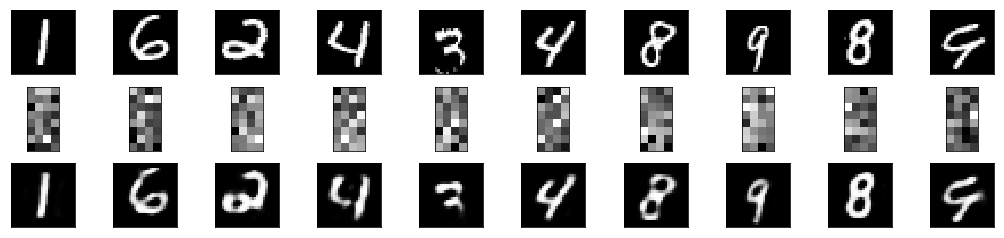

In [8]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep Autoencoder

In [9]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
_________________________________________________________________


## Encoder Model


In [10]:
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.2470 - val_loss: 0.1677
Epoch 2/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1515 - val_loss: 0.1371
Epoch 3/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1315 - val_loss: 0.1246
Epoch 4/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1225 - val_loss: 0.1177
Epoch 5/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1168 - val_loss: 0.1128
Epoch 6/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1126 - val_loss: 0.1098
Epoch 7/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1095 - val_loss: 0.1068
Epoch 8/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.1067 - val_loss: 0.1041
Epoch 9/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1045 - val_loss: 0.1023
Epoch

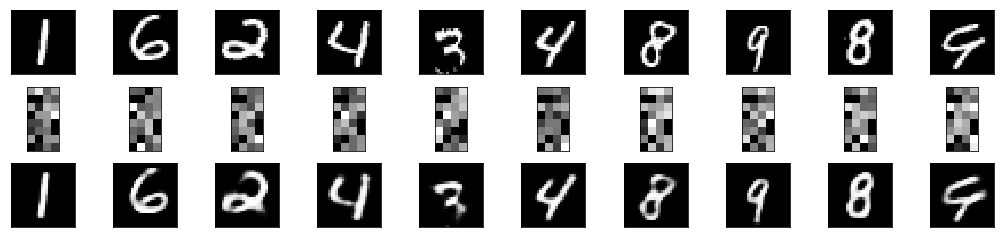

In [12]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional Autoencoder

In [13]:
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [14]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 8)           0         
__________

## Encoder Model


In [15]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_1').output)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
Total para

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=70,
                batch_size=128,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 10s 170us/step - loss: 0.1996 - val_loss: 0.1365
Epoch 2/70
60000/60000 [==============================] - 9s 145us/step - loss: 0.1254 - val_loss: 0.1155
Epoch 3/70
60000/60000 [==============================] - 9s 146us/step - loss: 0.1127 - val_loss: 0.1079
Epoch 4/70
60000/60000 [==============================] - 9s 147us/step - loss: 0.1068 - val_loss: 0.1036
Epoch 5/70
60000/60000 [==============================] - 9s 145us/step - loss: 0.1028 - val_loss: 0.1000
Epoch 6/70
60000/60000 [==============================] - 9s 146us/step - loss: 0.1000 - val_loss: 0.0974
Epoch 7/70
60000/60000 [==============================] - 9s 145us/step - loss: 0.0978 - val_loss: 0.0957
Epoch 8/70
60000/60000 [==============================] - 9s 146us/step - loss: 0.0961 - val_loss: 0.0941
Epoch 9/70
60000/60000 [==============================] - 9s 146us/step - loss: 0.0947 - val_loss: 0.

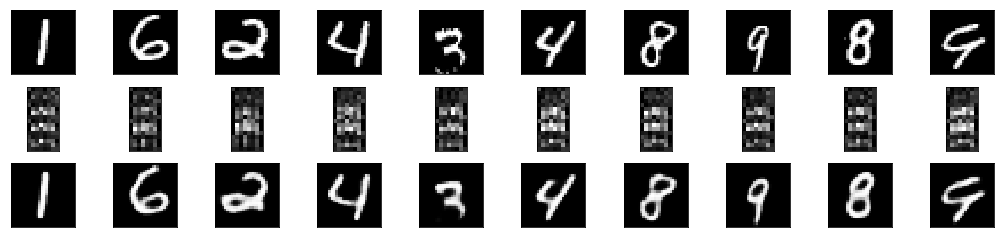

In [17]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from sklearn import svm

In [25]:
def train_test(data,labels):    
    
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
    
    return(X_train, X_test, y_train, y_test)

def kNN_classifier(x_train, y_train, x_test, y_test):
    # training a KNN classifier 
    from sklearn.neighbors import KNeighborsClassifier 
    knn = KNeighborsClassifier(n_neighbors = 10).fit(x_train, y_train) 

    # accuracy on X_test 
    accuracy = knn.score(x_test, y_test) 
    print(accuracy) 

    # creating a confusion matrix 
    knn_predictions = knn.predict(x_test)  
    cm = confusion_matrix(y_test, knn_predictions)
    print(cm)
    
    return 

def SVM_classifier(x_train, y_train, x_test, y_test):
    from sklearn.svm import SVC 
    svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
    svm_predictions = svm_model_linear.predict(x_test) 

    # model accuracy for X_test   
    accuracy = svm_model_linear.score(x_test, y_test) 

    # creating a confusion matrix 
    cm = confusion_matrix(y_test, svm_predictions) 
    print(cm)
    print(accuracy)
    

In [26]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = train_test(encoded_imgs , y_test)

cm_kNN, accuracy_kNN = kNN_classifier(x_train_enc, y_train_enc, x_test_enc, y_test_enc)
cm_SVM, accuracy_SVM = SVM_classifier(x_train_enc, y_train_enc, x_test_enc, y_test_enc)

print(cm_kNN)
print(accuracy_kNN) 
print(cm_SVM)
print(accuracy_SVM)

0.9448
[[260   0   0   0   0   1   1   0   0   0]
 [  0 294   1   1   0   0   0   0   0   0]
 [  1   1 234   0   0   0   0   2   2   0]
 [  0   2   1 261   0   1   0   1   2   1]
 [  1   0   1   0 233   0   4   0   0  28]
 [  3   1   0   6   0 189   1   0   5   3]
 [  1   1   0   0   1   0 230   0   0   0]
 [  0   2   1   0   5   0   0 206   0  17]
 [  8   0   1   2   1   0   1   3 232   1]
 [  4   4   0   4   4   2   0   4   0 223]]


TypeError: 'NoneType' object is not iterable

In [ ]:
x_train_enc, x_test_enc, y_train_enc, y_test_enc = train_test(simple_encoded_imgs , y_test)

cm_kNN, accuracy_kNN = kNN_classifier(x_train_enc, y_train_enc, x_test_enc, y_test_enc)
cm_SVM, accuracy_SVM = SVM_classifier(x_train_enc, y_train_enc, x_test_enc, y_test_enc)

print(cm_kNN)
print(accuracy_kNN) 
print(cm_SVM)
print(accuracy_SVM)